In [2]:
#%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import struct, os, math, random
from matplotlib import rc, font_manager
from numpy import pi, arcsin, cos, sin, percentile, exp

try:
    os.system('rm /Users/Lucas/.matplotlib/fontlist-v310.json')
except FileNotFoundError:
    pass
    
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

try:
    fm = font_manager.json_load(os.path.expanduser("~/.matplotlib/fontlist-v310.json"))
    fm.findfont("serif",fontext="afm", rebuild_if_missing=False)
except FileNotFoundError:
    pass

from matplotlib import rcParams
rcParams.update({'font.size': 14})

from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy import units as u
import datetime


In [39]:
def get_file(path):
    #opens and external file and makes it into a list
    fopen = path
    f=open(fopen, 'r+')
    g=list(f)
    g=map(lambda s: s.strip(), g)
    return np.array(list(g))

def splitt(old_list):
    #splits the list entries into sublists
    new_list=[]
    for i in old_list:
        new_list+=[i.split()]
    return np.array(new_list)

def splitt2(old_list,char):
    #splits the list entries into sublists
    new_list=[]
    for i in old_list:
        new_list+=[i.split(char)]
    return np.array(new_list)

def refine_fits(old_list, length_cat, symbol_cat, 
    column_search_number, column_retrival_number):
    #to refine an imported list after the use of get_file()
    #to remove header information or filter the list
    # only works for 2-dim type objects
    #symbol_cat is a single character
    tmp_list=[]
    if not length_cat==None:
        for i in old_list:
            if len(i)==length_cat:
                tmp_list+=[i]
    else:
        tmp_list=old_list
    tmp_list_2=[]
    if not symbol_cat==None:
        for i in tmp_list:
            if not column_search_number==None:
                column=i[column_search_number-1] #searches specific column for match
            else:
                column=i #searches all columns.
            for row_element in column: #searching rows in columns
                if row_element.count(symbol_cat)>0:
                    tmp_list_2+=[column]
                    break #ends if it finds it to prevent line repeats
                else:
                    continue #continues to look if it doesn't
    else:
        tmp_list_2=tmp_list
    tmp_list_3=[]
    if column_search_number==None:
        if not column_retrival_number==None:
            for i in tmp_list_2:
                tmp_list_3+=[i[column_retrival_number-1]]
        else:
            tmp_list_3=tmp_list_2
    else:
        tmp_list_3=tmp_list_2
    tmp_list_4 = []
    for k in range(len(tmp_list_3)):
        if 'localhos' not in tmp_list_3[k]:
            tmp_list_4+=[tmp_list_3[k]]
    return tmp_list_4

In [40]:
t, a, b, u, v, w, A_rr, P_rr, W_rr, \
                  A_ll, P_ll, W_ll, \
                  A_rl, P_rl, W_rl, \
                  A_lr, P_lr, W_lr = np.split(splitt(get_file('amp_phs.uvprt')[16:]),18,1)

In [120]:
a_rr = A_rr.astype(float).reshape(len(A_rr),)
a_ll = A_ll.astype(float).reshape(len(A_rr),)
a_rl = A_rl.astype(float).reshape(len(A_rr),)
a_lr = A_lr.astype(float).reshape(len(A_rr),)

b1 = np.char.strip(a.reshape(len(A_rr),),chars='-').astype(int)
b2 = np.char.strip(b.reshape(len(A_rr),),chars='-').astype(int)

ind = (b1==1)*(b2==2)

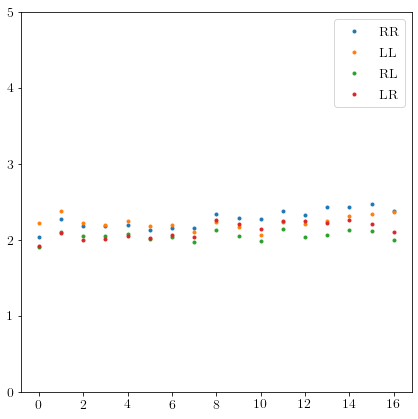

In [121]:
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(a_rr[ind],'.')
ax.plot(a_ll[ind],'.')
ax.plot(a_rl[ind],'.')
ax.plot(a_lr[ind],'.');
ax.legend(['RR','LL','RL','LR'])
ax.set_ylim(0,5);